In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
dataset = pd.read_csv('final_dataset.csv')

In [3]:
# statistical measures of the dataset
dataset.columns

Index(['resale_price', 'street_name', 'year', 'town', 'flat_type',
       'floor_area_sqm', 'flat_model', 'remaining_lease', 'max_storey',
       'dist_mrt', 'dist_cbd', 'cpi', 'town_premium', 'model_premium',
       'dist_mall', 'type_premium'],
      dtype='object')

# Rough Sensing of the Dataset - With and without flat type splits

We will first take a look at time series charts to check the general trend of the resale prices with categorial splits of town types.

    First plot is to check the number of resale flats in each flat type
    Second plot is to check the number of resale flats in each year

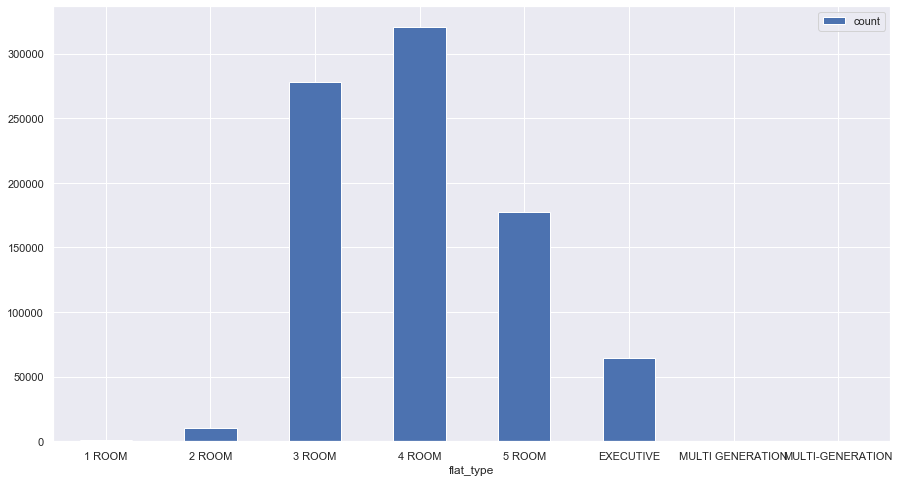

In [5]:
sns.set(rc={'figure.figsize':(15,8)})
test = dataset.groupby(['flat_type'],as_index = False).count()[['flat_type','resale_price']]
test = test.rename(columns = {'resale_price' : 'count'})
test.plot.bar(x='flat_type', y='count', rot=0)

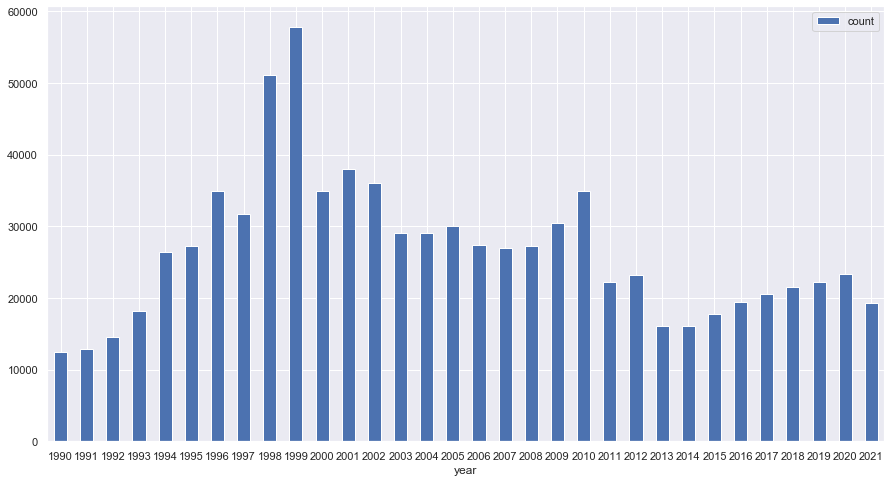

In [6]:
test = dataset.groupby(['year'],as_index = False).count()[['year','resale_price']]
test = test.rename(columns = {'resale_price' : 'count'})
test.plot.bar(x='year', y='count', rot=0)

Next step is to look at the correlations of all the features with resale prices using the corr method

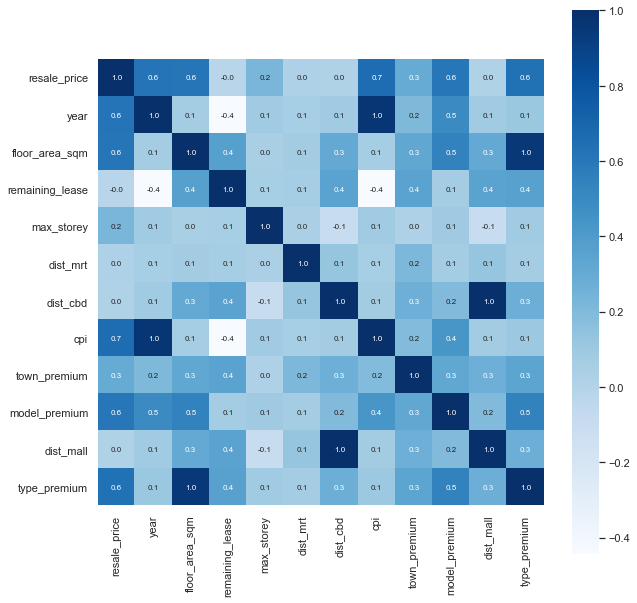

In [7]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Darker regions on the heatmap shows the correlation of the 2 variables

Focusing on the resale price row (1st row), it can be seen that the year, floor_area_sqm, model premium and type premium have a very strong correlation since all four have a score of 0.6. The variable with the highest correlation however is the CPI data which is at 0.7.
Another variable worth noting is the max_storey

The following parts will the split the data futher into flat types and check for these correlations once again.

# Modelling Part 1

We begin by modelling the flat type with the most resale flats which is the 4 Room flats

In [8]:
y = dataset[['resale_price']]
x = dataset[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium', 'type_premium']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [10]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(682522, 10) (682522, 1)
(170631, 10) (170631, 1)


In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [12]:
predictions = lm.predict(X_test)

In [13]:
model.coef_

array([[ 2.60179898e+03,  2.77705855e+03,  3.01787871e+03,
        -1.29840689e+04, -4.59198554e+03, -4.59198554e+03,
         9.60599074e+03, -8.24701947e-02,  5.17370563e-02,
         2.13047944e-01]])

Text(0, 0.5, 'Predictions')

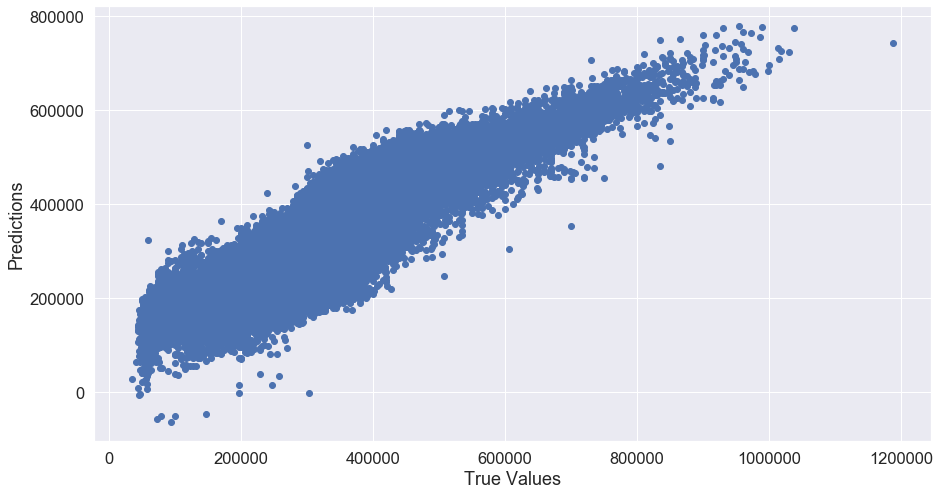

In [202]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:
#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.8443909041036615


In [15]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.01, 
                                          loss = 'ls')

In [16]:
clf2.fit(X_train,y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
clf2.score(X_test,y_test)

0.9374467745086414

In [19]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# perform normalization of the data
sc = StandardScaler()
X = sc.fit_transform(x)

In [21]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
x

,floor_area_sqm,remaining_lease,max_storey,dist_mrt,dist_cbd,dist_mall,cpi,town_premium,model_premium,type_premium
0,31.0,86,12,0.932303,8.552536,8.552536,62.743,-68000.0,-228000.0,-283500.0
1,31.0,86,6,0.932303,8.552536,8.552536,62.743,-68000.0,-228000.0,-283500.0
2,31.0,86,12,0.932303,8.552536,8.552536,62.743,-68000.0,-228000.0,-283500.0
3,31.0,86,9,0.932303,8.552536,8.552536,62.743,-68000.0,-228000.0,-283500.0
4,31.0,86,6,0.932303,8.552536,8.552536,62.743,-68000.0,-228000.0,-283500.0
...,...,...,...,...,...,...,...,...,...,...
853148,171.0,66,3,0.573855,14.850045,14.850045,99.818,-43000.0,105000.0,194500.0
853149,164.0,66,12,0.573855,14.850045,14.850045,99.818,-43000.0,105000.0,194500.0
853150,171.0,66,12,0.573855,14.850045,14.850045,99.818,-43000.0,105000.0,194500.0
853151,159.0,66,9,0.573855,14.850045,14.850045,99.818,-43000.0,105000.0,194500.0


In [22]:
print(pca.explained_variance_ratio_)

[3.39913630e-01 1.72068180e-01 1.41378761e-01 1.06624331e-01
 9.19925391e-02 7.50898103e-02 4.26070526e-02 2.57861677e-02
 4.53952809e-03 1.73280256e-33]


In [38]:
importance = clf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 24.13%
remaining_lease: 1.80%
max_storey: 1.08%
dist_mrt: 0.43%
dist_cbd: 3.83%
dist_mall: 4.08%
cpi: 48.89%
town_premium: 0.50%
model_premium: 2.89%
type_premium: 12.37%


Thc conclusion at this juncture is that the cpi is an overwhelming influence to the resale prices which may not actually be a causal feature. In the next model, cpi data will be left out.

In [39]:
y1 = dataset[['resale_price']]
x1 = dataset[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium', 'type_premium']]

Text(0, 0.5, 'Predictions')

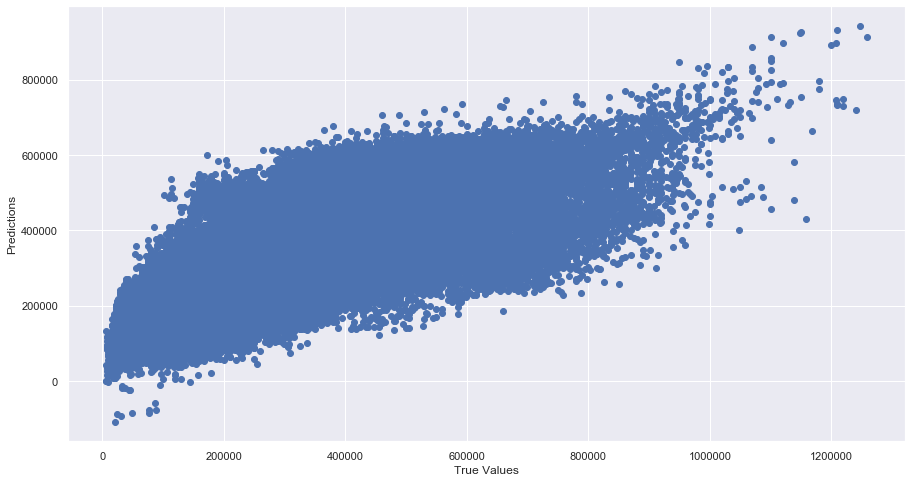

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [41]:
#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.6034004674575938


In [42]:
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.01, 
                                          loss = 'ls')

In [43]:
clf2.fit(X_train,y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
clf2.score(X_test,y_test)

0.7712251805323054

In [45]:
importance = clf2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 32.52%
remaining_lease: 13.06%
max_storey: 2.76%
dist_mrt: 0.53%
dist_cbd: 3.87%
dist_mall: 3.43%
town_premium: 2.82%
model_premium: 24.77%
type_premium: 16.23%


# Modelling Part 2 - Other Ensemble Methods

This time we use XGBoost Regressor

In [49]:
y = dataset[['resale_price']]
x = dataset[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium', 'type_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [50]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Prediction on the training data

In [51]:
predictions = model.predict(X_train)
# R squared error
score_1 = metrics.r2_score(y_train, predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.896483543174067
Mean Absolute Error :  36042.849877745946


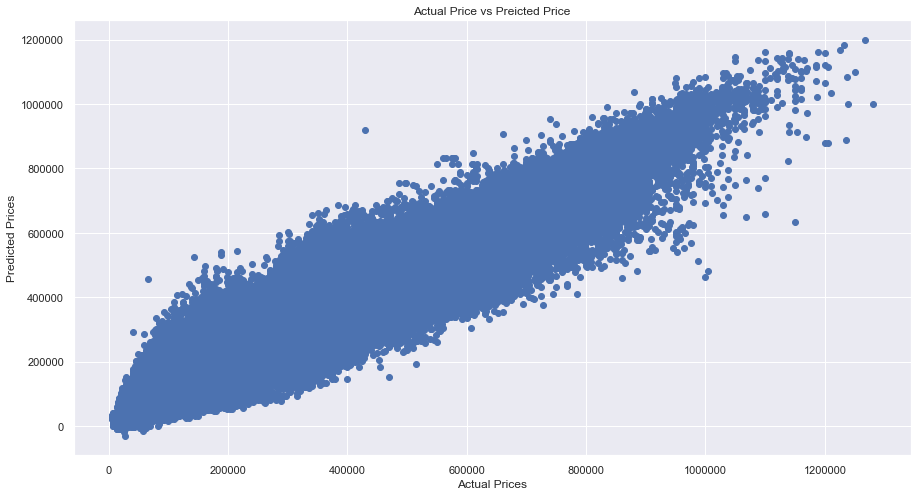

In [53]:
plt.scatter(y_train, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on test data

In [54]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8948801843050005
Mean Absolute Error :  36151.92808257641


The XGBoost Regressor outperperformed the ensemble.GradientBoostingRegressor with an  R squared error :  0.889328952806457 vs 0.8725476588633099
Its advantages can be explained by:
1. Its computing second-order gradients, i.e. second partial derivatives of the loss function (similar to Newton’s method)
2. Advanced regularization (L1 & L2), which improves model generalization.

In [55]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 14.73%
remaining_lease: 4.22%
max_storey: 4.52%
dist_mrt: 1.23%
dist_cbd: 4.04%
dist_mall: 0.00%
town_premium: 3.61%
model_premium: 19.89%
type_premium: 47.75%


Performing regression on data without cpi

In [284]:
y1 = dataset_4Room[['resale_price']]
x1 = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=4)
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Prediction on test data

In [285]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.886291929604193
Mean Absolute Error :  30670.49798201276


In [286]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 8.22%
remaining_lease: 10.90%
max_storey: 10.24%
dist_mrt: 3.73%
dist_cbd: 11.91%
dist_mall: 0.00%
town_premium: 10.05%
model_premium: 44.97%


Next we try with Random Forest Regressor

In [292]:
y = dataset_4Room[['resale_price']]
x = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

C:\Users\Cl3rity\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [293]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9682534579642255
Mean Absolute Error :  15862.69543469438


In [294]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.57%
remaining_lease: 7.16%
max_storey: 1.60%
dist_mrt: 1.60%
dist_cbd: 6.45%
dist_mall: 6.11%
cpi: 69.72%
town_premium: 2.86%
model_premium: 1.93%


Performing regression on data without cpi

In [302]:
y1 = dataset_4Room[['resale_price']]
x1 = dataset_4Room[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2,random_state=4)

# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [303]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9369942763135156
Mean Absolute Error :  20766.070843574522


In [304]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 11.08%
remaining_lease: 29.44%
max_storey: 5.69%
dist_mrt: 5.75%
dist_cbd: 8.26%
dist_mall: 10.28%
town_premium: 5.26%
model_premium: 24.24%


# Modelling Part 3 - Segmenting data based on periods

First, we revisit the chart of median resale price against year and also against cpi

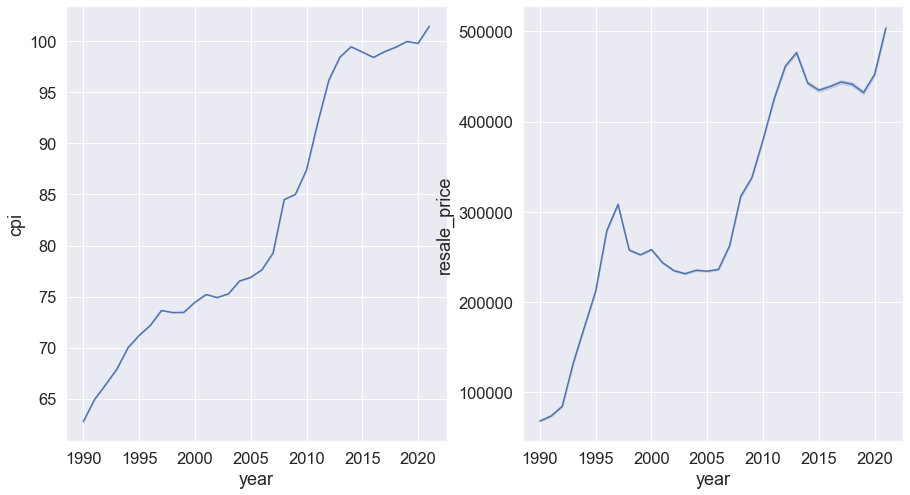

In [330]:
f, axes = plt.subplots(1, 2)
sns.lineplot(x=dataset.year, y=dataset.cpi, ax=axes[0])
sns.lineplot(x=dataset.year, y=dataset.resale_price, ax=axes[1])

From the 2 subplots, it can be identified that the resale prices was greatly affected by the cpi. The trend shows 1990 to 1997 to have the steepest resale price increases, followed by a relative stagnation from 1998 to 2006. The trend upwards continues from 2007 to 2013. Between 2014 to 2020, cpi and resale prices remained fairly stable. We will perform this splits for the 4 Room category once again.

In [320]:
dataset_1990s = dataset[(dataset['year'] >= 1990) & (dataset['year'] <= 1997) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_1990s[['resale_price']]
x = dataset_1990s[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 
                   'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [321]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9163764268911367
Mean Absolute Error :  20374.356085047686


In [322]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 1.83%
remaining_lease: 1.20%
max_storey: 1.29%
dist_mrt: 1.00%
dist_cbd: 2.42%
dist_mall: 2.61%
cpi: 81.98%
town_premium: 3.32%
model_premium: 4.34%


Dataset for year 1998 to 2006 for 4 Room flats

In [326]:
dataset_1998 = dataset[(dataset['year'] >= 1998) & (dataset['year'] <= 2006) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_1998[['resale_price']]
x = dataset_1998[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [327]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8630102096128165
Mean Absolute Error :  11786.291116370176


In [328]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 18.94%
remaining_lease: 16.85%
max_storey: 3.70%
dist_mrt: 4.08%
dist_cbd: 14.33%
dist_mall: 14.07%
cpi: 10.22%
town_premium: 12.73%
model_premium: 5.07%


Dataset for year 2007 to 2013 for 4 Room flats

In [331]:
dataset_2007 = dataset[(dataset['year'] >= 2007) & (dataset['year'] <= 2013) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_2007[['resale_price']]
x = dataset_2007[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [332]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9453190218792331
Mean Absolute Error :  17661.25719920905


In [333]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 2.42%
remaining_lease: 10.73%
max_storey: 2.93%
dist_mrt: 3.22%
dist_cbd: 10.63%
dist_mall: 10.52%
cpi: 52.56%
town_premium: 3.22%
model_premium: 3.77%


Dataset for year 2014 to 2020 for 4 Room flats

In [334]:
dataset_2014 = dataset[(dataset['year'] >= 2014) & (dataset['year'] <= 2020) & (dataset['flat_type'] == '4 ROOM')]
y = dataset_2014[['resale_price']]
x = dataset_2014[['floor_area_sqm', 'remaining_lease', 'max_storey', 'dist_mrt', 'dist_cbd', 'dist_mall', 'cpi', 'town_premium', 'model_premium']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.flatten())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [335]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9503747590995891
Mean Absolute Error :  18144.621155800472


In [336]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('{}: {:.2f}%'.format(X_train.columns[i],v*100))

floor_area_sqm: 4.48%
remaining_lease: 25.52%
max_storey: 4.85%
dist_mrt: 5.39%
dist_cbd: 22.91%
dist_mall: 22.87%
cpi: 1.81%
town_premium: 8.11%
model_premium: 4.07%
